In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings


warnings.filterwarnings("ignore")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huutrungle2001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
fake = pd.read_csv('fake.csv')
fake["label"] = 0
real = pd.read_csv('true.csv')
real["label"] = 1

data = pd.concat([fake, real], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data = data.dropna()
data = data.reset_index(drop=True)
data

,title,text,subject,date,label
0,WATCH: Kellyanne Conway Wore Out Her Welcome ...,CNN host Anderson Cooper s reactions to Kellya...,News,"May 10, 2017",0
1,BREAKING: IRS Will Investigate “Lawless” CLINT...,The house of cards is falling as America eager...,left-news,"Jul 27, 2016",0
2,Cameroon Anglophone protests reignite with sep...,"BUEA, Cameroon (Reuters) - Thousands of demons...",worldnews,"September 22, 2017",1
3,U.S. EPA bans some scientists from independent...,WASHINGTON (Reuters) - The U.S. Environmental ...,politicsNews,"October 31, 2017",1
4,"Uber, Google, Twitter, Netflix and Other Tech ...",21st Century Wire says A group of top Silicon ...,Middle-east,"February 6, 2017",0
...,...,...,...,...,...
44893,Twitter Destroys Trump For Using Dwyane Wade’...,Donald Trump s pathetic effort to reach out to...,News,"August 27, 2016",0
44894,"Trump Dominates South Carolina, Dooming The R...",Iiiiiitttt ssssssss a wonderful day in the (Wh...,News,"February 21, 2016",0
44895,Right-Wing Terrorist Found With Shrapnel-Fill...,The Republican Party has spent more than seven...,News,"February 2, 2016",0
44896,WHILE #UnFitHillary Rests And Parties With Don...,Wow! These are not good numbers for Hillary in...,left-news,"Sep 5, 2016",0


In [80]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['text'] = data['text'].apply(preprocess_text)

In [81]:
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [82]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Decision Tree Classifier Accuracy: 0.9954
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4666
           1       0.99      1.00      1.00      4314

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



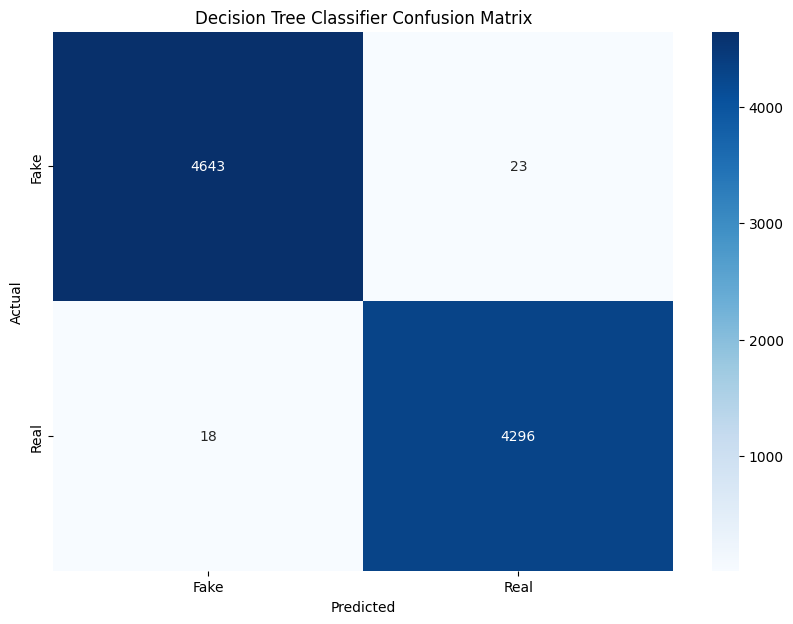

In [83]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_vectorized, y_train)
y_pred_dt = dt_classifier.predict(X_test_vectorized)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Decision Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classifier Accuracy: 0.9983
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4666
           1       1.00      1.00      1.00      4314

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



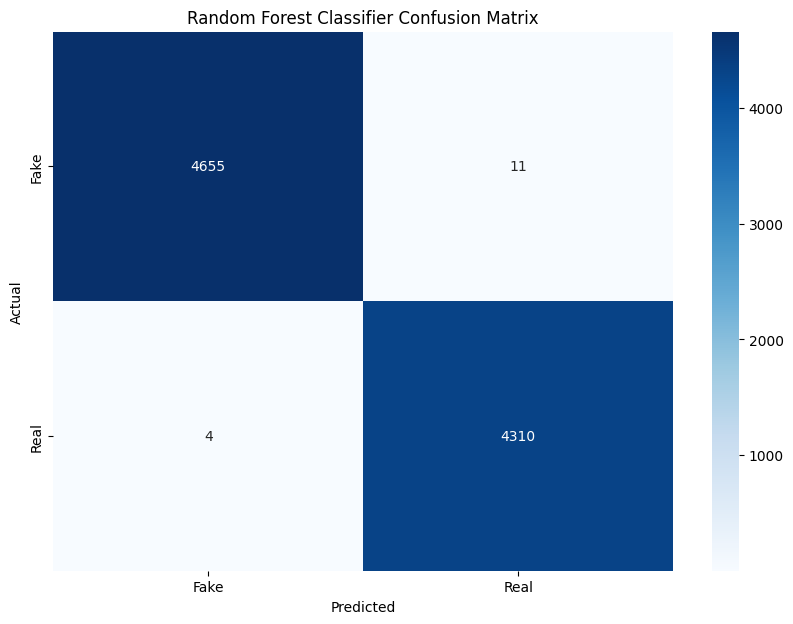

In [84]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)
y_pred_rf = rf_classifier.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[
            'Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()